In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# PART 1

def uni_sample(min, max, N):
  return np.random.randint(min, max, N, int)



def norm_sample(mean, stdv, N):
  return np.random.normal(mean, stdv, N)

(array([12., 12., 11., 13., 14.,  8., 10., 13.,  7.]),
 array([160.        , 162.66666667, 165.33333333, 168.        ,
        170.66666667, 173.33333333, 176.        , 178.66666667,
        181.33333333, 184.        ]),
 <a list of 9 Patch objects>)

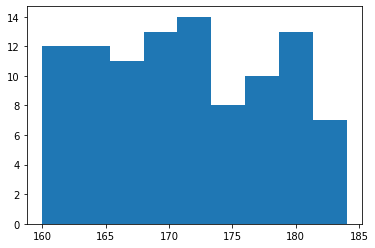

In [ ]:
#proof 1
plt.hist(uni_sample(160, 185, 100), 9)

(array([  5.,  33.,  83., 196., 267., 221., 135.,  50.,  10.]),
 array([154.29922079, 157.5964856 , 160.8937504 , 164.19101521,
        167.48828001, 170.78554482, 174.08280962, 177.38007443,
        180.67733924, 183.97460404]),
 <a list of 9 Patch objects>)

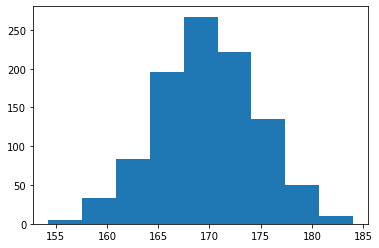

In [ ]:
#proof 2
plt.hist(norm_sample(170, 5, 1000), 9)

In [ ]:
# PART 2

def verosim_eval(sample, mean, stdv):
 return np.prod((1/np.sqrt(2*np.pi*pow(stdv, 2))) * np.exp((-1/2*pow(stdv, 2)) * (sample-mean)**2))

In [ ]:
func = verosim_eval(norm_sample(177,1, 10), 176, 2)
func

3.5550042583287195e-14

In [ ]:
func = verosim_eval(norm_sample(177,1, 10), 174, 2)
func

1.1833251539305863e-87

Note que al alejarse de, por ejemplo, la media con la qu fue creada la muestra la probabilidad disminuye.

In [ ]:
# PART 3

func = verosim_eval(norm_sample(177,1, 100), 174, 2)
func

0.0

Para una muestra más grande esta probabilidad se trunca a cero por ser una productoria de número muy pequeños. Por lo que una posible solución es cambiar la escala de la probabilidad. En este caso lo que se va a tomar no es la probabilidad de provenir de una distribución normal sino el logaritmo de esa probabilidad, por lo que la evaluación de la función de verosimilitud sería

In [ ]:
def verosim_eval2(sample, mean, stdv):
 return sum(np.log((1/np.sqrt(2*np.pi*pow(stdv, 2))) * np.exp((-1/2*pow(stdv, 2)) * (sample-mean)**2)))

In [ ]:
func = verosim_eval2(norm_sample(177,1, 100), 176, 2)
func

-583.7688050144031

In [ ]:
func = verosim_eval2(norm_sample(177,1, 100), 172, 2)
func

-5583.274033847282

Como se puede observar en los dos ejemplos anteriores para una media de prueba más cercana al valor real la probabilidad es mayor y es dada en una escala más comprensible y funcional.

In [ ]:
# PART 4

def optimum_param(sample):
  mu = (1/len(sample)) * sum(sample)

  stdv = (1/len(sample)) * sum(pow(sample-mu, 2))

  return mu, np.sqrt(stdv)

In [ ]:
optimum_param(norm_sample(170,5, 1000))

(169.7145157670761, 4.9664716553676085)

In [ ]:
optimum_param(norm_sample(25, 3, 1000))

(25.085092914721283, 2.9479586410250915)

In [ ]:
# PARTE 2 Respuesta 5

for i in range(0,10):
  optimum_stdv = []

  for i in range(0,10000):
    optimum_stdv += [optimum_param(norm_sample(170, 1, 30))[1]]

  mean_stdv = sum(optimum_stdv) / len(optimum_stdv)
  print(mean_stdv)


0.9763566626755901
0.9718779462403885
0.9764908896597532
0.9737725718140615
0.9760550603216208
0.9753043166041918
0.9765676947587497
0.9767505272609884
0.9769543794884358
0.9747651513483977


Como se puede ver en las 10 corridas anteriores la media de esta varianza no parece aproximar del todo el valor conocido de 1, por lo que una posible solución es que desde un inicio se tomen más observaciones, en el siguiente caso se muestra un proceso similar anterior con un set de datos de 300

In [ ]:
for i in range(0,10):
  optimum_stdv = []

  for i in range(0,10000):
    optimum_stdv += [optimum_param(norm_sample(170, 1, 300))[1]]

  mean_stdv = sum(optimum_stdv) / len(optimum_stdv)
  print(mean_stdv)


0.9975976284663997
0.9981533384400071
0.9978869412186264
0.9983621855236208
0.9973699035934165
0.9971793105417354
0.9972373409750946
0.9980234084728099
0.9976771573367994
0.9975228290352086


por lo que en este caso se aproxima mejor el parametro de la varianza.